# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
species = pd.read_csv('species_info.csv')
species.head()

category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN

In [4]:
observations = pd.read_csv('observations.csv')
observations.head()

scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85

In [5]:
print('species shape: {}'.format(species.shape))
print('observations shape: {}'.format(observations.shape))

species shape: (5824, 4)
observations shape: (23296, 3)


In [6]:
print('Number of Species: {}'.format(species.scientific_name.nunique()))

Number of Species: 5541


In [7]:
print('Number of Categories: {}'.format(species.category.nunique()))
print('Categories: {}'.format(species.category.unique()))

Number of Categories: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [8]:
species.groupby('category').size().sort_values(ascending = False)

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
dtype: int64

In [9]:
print('Number of Conservation Statuses: {}'.format(species.conservation_status.nunique()))
print('Conservation Statuses: {}'.format(species.conservation_status.unique()))

Number of Conservation Statuses: 4
Conservation Statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [10]:
print('na values count: {}'.format(species.conservation_status.isna().sum()))
print(species.groupby('conservation_status').size().sort_values(ascending = False))

na values count: 5633
conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
dtype: int64


In [11]:
print('Number of Parks: {}'.format(observations.park_name.nunique()))
print('Park Names: {}'.format(observations.park_name.unique()))

Number of Parks: 4
Park Names: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [12]:
print('Number of Observations: {}'.format(observations.observations.sum()))

Number of Observations: 3314739


In [13]:
species.conservation_status.fillna('No Intervention', inplace = True)
species.groupby('conservation_status').size().sort_values(ascending = False)

conservation_status
No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
dtype: int64

In [14]:
conservationCategory = species[species.conservation_status != 'No Intervention']\
    .groupby(['conservation_status', 'category'])['scientific_name'].count().unstack().reset_index()
conservationCategory

category conservation_status  Amphibian  Bird  Fish  Mammal  \
0                 Endangered        1.0   4.0   3.0     7.0   
1                In Recovery        NaN   3.0   NaN     1.0   
2         Species of Concern        4.0  72.0   4.0    28.0   
3                 Threatened        2.0   NaN   4.0     2.0   

category  Nonvascular Plant  Reptile  Vascular Plant  
0                       NaN      NaN             1.0  
1                       NaN      NaN             NaN  
2                       5.0      5.0            43.0  
3                       NaN      NaN             2.0

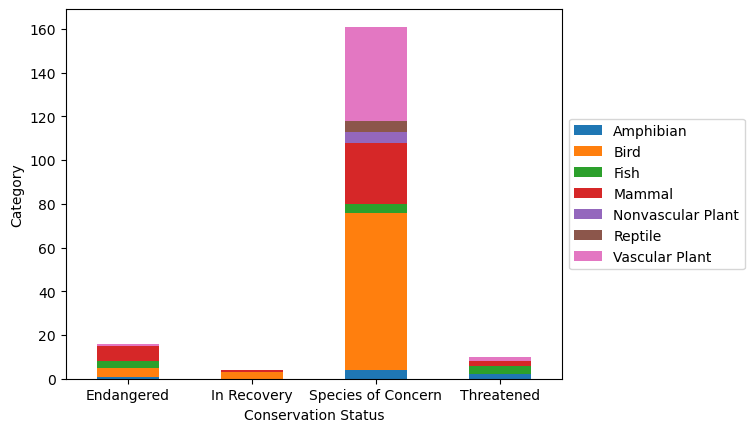

<Figure size 640x480 with 0 Axes>

In [15]:
conservationCategory.plot(kind = 'bar', stacked = True)
plt.xlabel('Conservation Status')
plt.ylabel('Category')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1)
ax = plt.subplot()
ax.set_xticklabels(conservationCategory['conservation_status'], rotation = 0)
plt.show()
plt.clf()

In [16]:
species['is_protected'] = species.conservation_status != 'No Intervention'

In [17]:
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()\
    .pivot(columns ='is_protected', index = 'category', values = 'scientific_name').reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']
# category_counts = category_counts.melt(id_vars = ['category'], var_name = 'is_protected', value_name = 'count')
category_counts

category  not_protected  protected
0          Amphibian             72          7
1               Bird            413         75
2               Fish            115         11
3             Mammal            146         30
4  Nonvascular Plant            328          5
5            Reptile             73          5
6     Vascular Plant           4216         46

In [18]:
category_counts['percent_protected'] = np.round((category_counts.protected/(category_counts.protected + category_counts.not_protected))\
                                                *100, 2)
category_counts

category  not_protected  protected  percent_protected
0          Amphibian             72          7               8.86
1               Bird            413         75              15.37
2               Fish            115         11               8.73
3             Mammal            146         30              17.05
4  Nonvascular Plant            328          5               1.50
5            Reptile             73          5               6.41
6     Vascular Plant           4216         46               1.08

In [19]:
from scipy.stats import chi2_contingency

contingency_bird_mammal = [[75, 413], [30, 146]]
chi2_contingency(contingency_bird_mammal)

Chi2ContingencyResult(statistic=0.16170148316545574, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 77.1686747, 410.8313253],
       [ 27.8313253, 148.1686747]]))

In [20]:
contingency_mammal_reptile = [[30, 146], [5, 73]]
chi2_contingency(contingency_mammal_reptile)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

In [21]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_names = species[species.category == 'Mammal'].common_names.apply(remove_punctuations).str.split().tolist()
common_names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [22]:
cleanRows = []

for item in common_names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [23]:
collapsed_list = list(chain.from_iterable(cleanRows))
collapsed_list[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [24]:
words_counted = []

for i in collapsed_list:
    x = collapsed_list.count(i)
    words_counted.append((i, x))
pd.DataFrame(set(words_counted), columns = ['words', 'count']).sort_values('count', ascending = False).reset_index().head(10)

index     words  count
0      7       Bat     23
1    141     Shrew     18
2     55    Myotis     17
3    121     Mouse     16
4    166  Chipmunk     13
5     72  Squirrel     12
6    163  American     12
7    105      Vole     11
8     13   Eastern     11
9     68   Western     10

In [25]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)
species.head(10)

category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole     No Intervention   
1                              American Bison, Bison     No Intervention   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                                      Wapiti Or Elk     No Intervention   
5                                  White-Tailed Deer     No Intervention   
6                                Feral Hog, Wild Pig     No Intervention   
7                                             Coyote  Species of Concern   
8                                          Gray Wolf          Endangered   
9                                           Red Wolf          Endangered   

   is_protected  is_bat  
0         False   False  
1         False   False  
2         False   False  
3         False   False  
4         False   False  
5         False   False  
6         False   False  
7          True   False  
8          True   False  
9          True   False

In [29]:
species[species.is_bat]

category            scientific_name  \
28     Mammal   Corynorhinus rafinesquii   
29     Mammal           Eptesicus fuscus   
30     Mammal  Lasionycteris noctivagans   
31     Mammal          Lasiurus borealis   
32     Mammal          Lasiurus cinereus   
36     Mammal              Myotis leibii   
37     Mammal           Myotis lucifugus   
38     Mammal     Myotis septentrionalis   
39     Mammal             Myotis sodalis   
40     Mammal       Nycticeius humeralis   
3033   Mammal         Antrozous pallidus   
3034   Mammal    Corynorhinus townsendii   
3035   Mammal           Eptesicus fuscus   
3036   Mammal          Euderma maculatum   
3037   Mammal  Lasionycteris noctivagans   
3038   Mammal          Lasiurus cinereus   
3040   Mammal         Myotis ciliolabrum   
3042   Mammal           Myotis lucifugus   
4461   Mammal             Eumops perotis   
4462   Mammal      Tadarida brasiliensis   
4463   Mammal    Corynorhinus townsendii   
4464   Mammal      Lasiurus blossevillii   
4468   Mammal      Parastrellus hesperus   

                                           common_names conservation_status  \
28                           Rafinesque's Big-Eared Bat     No Intervention   
29                                        Big Brown Bat  Species of Concern   
30                                    Silver-Haired Bat  Species of Concern   
31                             Eastern Red Bat, Red Bat     No Intervention   
32                                            Hoary Bat     No Intervention   
36    Eastern Small-Footed Bat, Eastern Small-Footed...  Species of Concern   
37                Little Brown Bat, Little Brown Myotis  Species of Concern   
38             Northern Long-Eared Bat, Northern Myotis          Threatened   
39                Indiana Bat, Indiana Or Social Myotis          Endangered   
40                                          Evening Bat     No Intervention   
3033                             Pallid Bat, Pallid Bat  Species of Concern   
3034  Mule-Eared Bat, Pacific Townsend's Big-Eared B...     No Intervention   
3035                       Big Brown Bat, Big Brown Bat  Species of Concern   
3036                           Spotted Bat, Spotted Bat  Species of Concern   
3037               Silver-Haired Bat, Silver-Haired Bat  Species of Concern   
3038                               Hoary Bat, Hoary Bat     No Intervention   
3040  Small-Footed Myotis, Western Small-Footed Bat,...     No Intervention   
3042  Little Brown Bat, Little Brown Myotis, Little ...  Species of Concern   
4461                                Western Mastiff Bat     No Intervention   
4462                            Mexican Free-Tailed Bat     No Intervention   
4463                           Townsend's Big-Eared Bat     No Intervention   
4464                                    Western Red Bat  Species of Concern   
4468                                         Canyon Bat     No Intervention   

      is_protected  is_bat  
28           False    True  
29            True    True  
30            True    True  
31           False    True  
32           False    True  
36            True    True  
37            True    True  
38            True    True  
39            True    True  
40           False    True  
3033          True    True  
3034         False    True  
3035          True    True  
3036          True    True  
3037          True    True  
3038         False    True  
3040         False    True  
3042          True    True  
4461         False    True  
4462         False    True  
4463         False    True  
4464          True    True  
4468         False    True

In [33]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

scientific_name                            park_name  \
0       Lasiurus blossevillii                  Bryce National Park   
1       Lasiurus blossevillii  Great Smoky Mountains National Park   
2       Lasiurus blossevillii               Yosemite National Park   
3       Lasiurus blossevillii            Yellowstone National Park   
4    Corynorhinus rafinesquii               Yosemite National Park   
..                        ...                                  ...   
139            Myotis sodalis            Yellowstone National Park   
140             Myotis leibii               Yosemite National Park   
141             Myotis leibii                  Bryce National Park   
142             Myotis leibii  Great Smoky Mountains National Park   
143             Myotis leibii            Yellowstone National Park   

     observations category                                       common_names  \
0             113   Mammal                                    Western Red Bat   
1              70   Mammal                                    Western Red Bat   
2             123   Mammal                                    Western Red Bat   
3             221   Mammal                                    Western Red Bat   
4             188   Mammal                         Rafinesque's Big-Eared Bat   
..            ...      ...                                                ...   
139            68   Mammal              Indiana Bat, Indiana Or Social Myotis   
140           132   Mammal  Eastern Small-Footed Bat, Eastern Small-Footed...   
141            84   Mammal  Eastern Small-Footed Bat, Eastern Small-Footed...   
142            49   Mammal  Eastern Small-Footed Bat, Eastern Small-Footed...   
143           233   Mammal  Eastern Small-Footed Bat, Eastern Small-Footed...   

    conservation_status  is_protected  is_bat  
0    Species of Concern          True    True  
1    Species of Concern          True    True  
2    Species of Concern          True    True  
3    Species of Concern          True    True  
4       No Intervention         False    True  
..                  ...           ...     ...  
139          Endangered          True    True  
140  Species of Concern          True    True  
141  Species of Concern          True    True  
142  Species of Concern          True    True  
143  Species of Concern          True    True  

[144 rows x 8 columns]

In [35]:
bat_observations.groupby('park_name').observations.sum().reset_index()

park_name  observations
0                  Bryce National Park          3433
1  Great Smoky Mountains National Park          2411
2            Yellowstone National Park          8362
3               Yosemite National Park          4786

In [54]:
obs_by_park = bat_observations.groupby(['park_name','is_protected']).observations.sum().reset_index()
obs_by_park['is_protected'] = obs_by_park['is_protected'].astype(str)
obs_by_park

park_name is_protected  observations
0                  Bryce National Park        False          1596
1                  Bryce National Park         True          1837
2  Great Smoky Mountains National Park        False          1299
3  Great Smoky Mountains National Park         True          1112
4            Yellowstone National Park        False          4044
5            Yellowstone National Park         True          4318
6               Yosemite National Park        False          2345
7               Yosemite National Park         True          2441

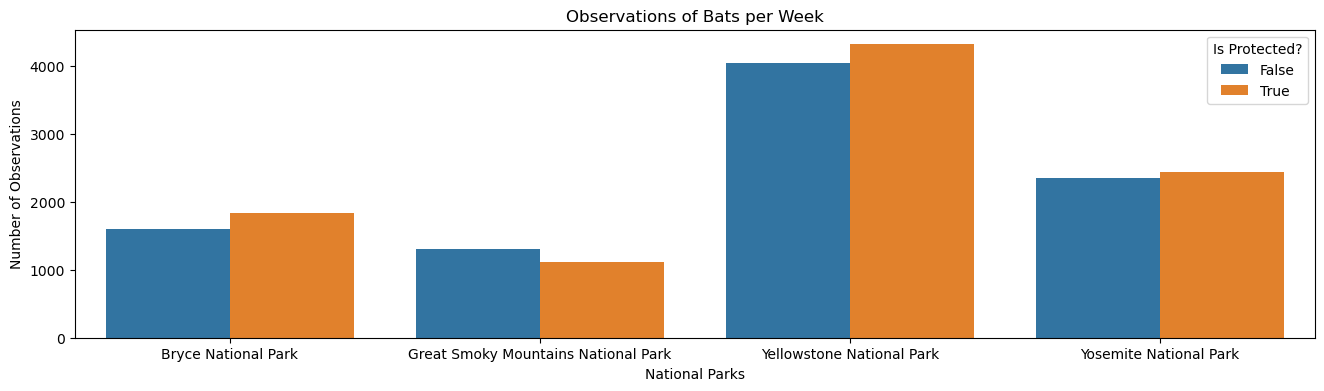

<Figure size 640x480 with 0 Axes>

In [62]:
plt.figure(figsize = (16, 4))
sns.barplot(x = obs_by_park.park_name, y = obs_by_park.observations, hue = obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.legend(title = ('Is Protected?'))
plt.show()
plt.clf()

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.
